<span style="display: inline-block; margin-right: 10px; vertical-align: middle; border: 1px solid #F8F8F8; border-radius: 8px; padding: 5px; background-color: #F8F8F8;">
    <a href="https://www.designsafe-ci.org/workspace/jupyter-lab-hpc-cuda-ds?appVersion=1.1.1" target="_parent" style="text-decoration: none;">
        <span style="font-family: Helvetica, sans-serif; font-size: 13px; color: #565656; margin-right: 5px; vertical-align: middle; font-weight: 600;">Open in</span>
        <img src="https://www.designsafe-ci.org/media/filer_public/2d/d3/2dd37fbf-289e-49cf-9c1a-879c864c4e17/nsf_nheri-ds.png" alt="Open in DesignSafe" style="width: 100px; height: auto; vertical-align: middle;">
    </a>
</span>

<span style="display: inline-block; margin-right: 10px; vertical-align: middle;">
    <a href="https://colab.research.google.com/github/NHERI-SimCenter/BrailsPlusPlus/blob/master/examples/image_processor/nfloor_detector.ipynb" target="_parent">
        <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" style="width: 130px; height: auto; vertical-align: middle;"/>
    </a>
</span>

<span style="display: inline-block; vertical-align: middle; margin-top: 6px;">
    <a target="_blank" href="https://lightning.ai/new?repo_url=https%3A//github.com/NHERI-SimCenter/BrailsPlusPlus/blob/master/examples/image_processor/nfloor_detector.ipynb">
        <img src="https://pl-bolts-doc-images.s3.us-east-2.amazonaws.com/app-2/studio-badge.svg" alt="Open in Studio" style="width: 120px; height: auto; vertical-align: middle;"/>
    </a>
</span>

## **Install BRAILS++**
BRAILS++ is not yet available on PyPi. The following line installs the latest version from the GitHub repository using `pip`.

In [1]:
!pip install git+https://github.com/NHERI-SimCenter/BrailsPlusPlus

  Cloning https://github.com/NHERI-SimCenter/BrailsPlusPlus to /tmp/pip-req-build-m_1t0jxa
  Running command git clone --filter=blob:none --quiet https://github.com/NHERI-SimCenter/BrailsPlusPlus /tmp/pip-req-build-m_1t0jxa
  Resolved https://github.com/NHERI-SimCenter/BrailsPlusPlus to commit 0e86aa622d7d4f163f06718bfceb9d8e8c5912c8
  Preparing metadata (setup.py) ... done


## **Import ImageSet and Importer Methods of BRAILS++**
BRAILS++ offers various Artificial Intelligence-powered modules for predicting building and infrastructure attributes from images, such as the `NFloorDetector` demonstrated in this example.

The `Importer` class provides the main methods to load these modules. To gather the images needed for attribute prediction, users can use the ImageSet class or BRAILS++ scrapers, which facilitate automated asset geometry and image retrieval. This example illustrates both methods for sourcing imagery for use with the `NFloorDetector` module.

In [2]:
from brails.types.image_set import ImageSet
from brails import Importer
from brails.utils import PlotTools

## **Define Google API Key**
You need a Google API Key with Street View Static API enabled to download the Google Street View imagery required for this example. Please follow this [link](https://support.google.com/googleapi/answer/6158862?hl=en) for instructions on setting up a Google API key.

In [3]:
API_KEY = 'YOUR-API-KEY-HERE'

## **Load Street-Level Imagery: (Option 1) Download Imagery by Specifying the Region Name**
The `NFloorDetector` class is created to predict the number of floors in buildings from street-level imagery. In this option, BRAILS++ retrieves the required imagery by following the steps below.
1. <strong>Call the `RegionBoundary` class with the necessary details to specify the region of interest.</strong> In this example, street-level imagery of buildings in Atlantic County, NJ, are downloaded. Therefore, the required information includes the `type` of information provided and the `data` itself, which are the `locationName` and `Atlantic County, NJ`.

2. <strong>Download the footprint inventory for the `RegionBoundary` saved in `region_boundary_object` by downloading the OpenStreetMap footprint data through the `OSM_FootprintScraper`.</strong> The only information required to initialize `OSM_FootprintScraper` is the desired output unit for `length`, which, in this case, is `ft`. The output of `OSM_FootprintScraper` is an `AssetInventory` saved in `atlantic_fp`.

3. <strong>Get a randomly selected `100` building subset of the footprint inventory obtained using `atlantic_fp`. </strong> This subset is obtained using the `get_random_sample` method of an `AssetInventory` object and is stored in `atlantic_fp_subset`. For this example, the random seed is set to `40` for reproducibility of the results.

4. <strong>Get the street-level imagery for the selected subset using `get_images` method of `GoogleStreetview` module.</strong> `get_images` requires two inputs 1) AssetInventory for which the images will be retrieved (in this example, `atlantic_fp_subset`) and 2) the path to the folder where the retrieved images will be saved, which in this case is `tmp/street/`.


In [4]:
# Select a region and create its RegionBoundary:
importer = Importer()

region_data = {"type": "locationName",
               "data": "Atlantic County, NJ"}
region_boundary_class = importer.get_class("RegionBoundary")
region_boundary_object = region_boundary_class(region_data)

osm_fp_class = importer.get_class("OSM_FootprintScraper")
osm_fp_data = {"length": "ft"}
footprint_scraper = osm_fp_class(osm_fp_data)
atlantic_fp = footprint_scraper.get_footprints(region_boundary_object)

# Subsample from the extracted assets to keep the image downloading step quick.
# Here, we are randomly sampling 20 buildings using a random seed value of 40:
atlantic_fp_subset = atlantic_fp.get_random_sample(100, 40)

# Get street-level imagery for the selected subset using GoogleStreetview:
google_street_class = importer.get_class("GoogleStreetview")
google_street = google_street_class({'apiKey': API_KEY})
images_street = google_street.get_images(
    atlantic_fp_subset, "tmp/street/")


Searching for Atlantic County, NJ...
Found Atlantic County, New Jersey, United States

Found a total of 18937 building footprints in Atlantic County


INFO:brails.scrapers.google_streetview.google_streetview:
Images will be saved to: /home/bacetiner/Documents/BrailsPlusPlus/examples/image_processor/tmp/street

Obtaining street-level imagery:   1%|           | 1/100 [00:00<00:11,  8.57it/s]INFO:brails.scrapers.google_streetview.google_streetview:No street-level imagery found for the building located at 39.4240, -74.7010
INFO:brails.scrapers.google_streetview.google_streetview:No street-level imagery found for the building located at 39.4453, -74.6869
INFO:brails.scrapers.google_streetview.google_streetview:No street-level imagery found for the building located at 39.4922, -74.4590
INFO:brails.scrapers.google_streetview.google_streetview:No street-level imagery found for the building located at 39.3750, -74.6283
INFO:brails.scrapers.google_streetview.google_streetview:No street-level imagery found for the building located at 39.4895, -74.4675
INFO:brails.scrapers.google_streetview.google_streetview:No street-level imagery found for the

## **Predict Number of Floors in a Building Using NFloorDetector Module**
`NFloorDetector` includes a pre-trained EfficientDet_D4 model that has been trained on a custom dataset of 68,000 images. This model is capable of identifying the number of floors in buildings.

In [5]:
importer = Importer()
nfloor_detector_class = importer.get_class('NFloorDetector')
nfloor_detector = nfloor_detector_class()
predictions = nfloor_detector.predict(images_street)


Determining the number of floors for each building...
Default floor detector model in tmp/models/efficientdet-d4_nfloorDetector.pth loaded

Performing floor detections...


100%|███████████████████████████████████████████| 76/76 [00:17<00:00,  4.25it/s]


Total execution time: 00:00:18.28


## **Show Prediction Results**

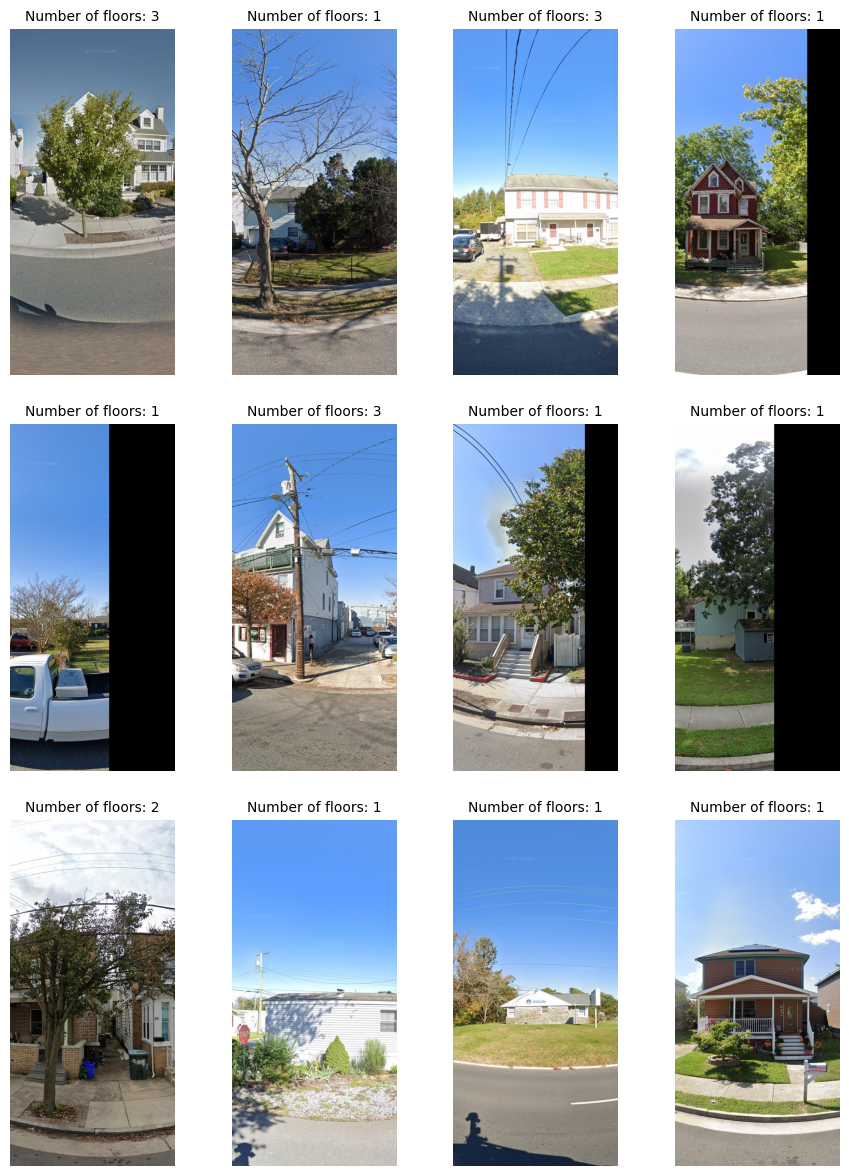

In [11]:
PlotTools.show_predictions(images=images_street, predictions=predictions, attribute_name='Number of floors', num_samples=12)